# Homework #2

Dimitrios TERESSONOK - B00763957
Semen MANUSHKO - B00760363
William TAN - B00762546      

In [1]:
import pandas as pd
from pandas_datareader import data as dt
from scipy.interpolate import interp1d
from scipy import integrate
import numpy as np
import scipy.stats as si
import time 
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import norm
import datetime

## 1. Clean the data. There are some NaN values.

In [2]:
data = pd.read_csv('SPX_2016_options.csv', header=None)
data.columns = ['ID','Ddate','Date','Maturity','Days to Maturity','Call/Put','Strike','Bid','Ask','9','10',
                'Implied Vol','Spot','13','14','15','Risk-Free Rate']

In [3]:
data = data.dropna()
data.head()

,ID,Ddate,Date,Maturity,Days to Maturity,Call/Put,Strike,Bid,Ask,9,10,Implied Vol,Spot,13,14,15,Risk-Free Rate
128,108105,20160104,736333,736344,11,1,1875,135.3,138.2,500,311,0.149708,2012.66,-0.015304,1,1,0.007121
129,108105,20160104,736333,736344,11,1,1880,130.1,133.9,12,29,0.184996,2012.66,-0.015304,1,1,0.007121
130,108105,20160104,736333,736344,11,1,1885,125.4,129.1,0,7,0.196155,2012.66,-0.015304,1,1,0.007121
131,108105,20160104,736333,736344,11,1,1890,120.7,124.4,5,30,0.203980,2012.66,-0.015304,1,1,0.007121
132,108105,20160104,736333,736344,11,1,1895,116.5,119.3,0,5,0.209911,2012.66,-0.015304,1,1,0.007121


## 2. Create a new column with the price of the options (average of the ask and bid prices).

In [4]:
data['Option Midprice'] = data[["Ask", "Bid"]].mean(axis=1)
data.head()

,ID,Ddate,Date,Maturity,Days to Maturity,Call/Put,Strike,Bid,Ask,9,10,Implied Vol,Spot,13,14,15,Risk-Free Rate,Option Midprice
128,108105,20160104,736333,736344,11,1,1875,135.3,138.2,500,311,0.149708,2012.66,-0.015304,1,1,0.007121,136.75
129,108105,20160104,736333,736344,11,1,1880,130.1,133.9,12,29,0.184996,2012.66,-0.015304,1,1,0.007121,132.00
130,108105,20160104,736333,736344,11,1,1885,125.4,129.1,0,7,0.196155,2012.66,-0.015304,1,1,0.007121,127.25
131,108105,20160104,736333,736344,11,1,1890,120.7,124.4,5,30,0.203980,2012.66,-0.015304,1,1,0.007121,122.55
132,108105,20160104,736333,736344,11,1,1895,116.5,119.3,0,5,0.209911,2012.66,-0.015304,1,1,0.007121,117.90


## 3. Use data with prices larger than 0.05 dollar.

In [5]:
data = data.loc[data['Option Midprice'] > 0.05]
data.head()

,ID,Ddate,Date,Maturity,Days to Maturity,Call/Put,Strike,Bid,Ask,9,10,Implied Vol,Spot,13,14,15,Risk-Free Rate,Option Midprice
128,108105,20160104,736333,736344,11,1,1875,135.3,138.2,500,311,0.149708,2012.66,-0.015304,1,1,0.007121,136.75
129,108105,20160104,736333,736344,11,1,1880,130.1,133.9,12,29,0.184996,2012.66,-0.015304,1,1,0.007121,132.00
130,108105,20160104,736333,736344,11,1,1885,125.4,129.1,0,7,0.196155,2012.66,-0.015304,1,1,0.007121,127.25
131,108105,20160104,736333,736344,11,1,1890,120.7,124.4,5,30,0.203980,2012.66,-0.015304,1,1,0.007121,122.55
132,108105,20160104,736333,736344,11,1,1895,116.5,119.3,0,5,0.209911,2012.66,-0.015304,1,1,0.007121,117.90


## 4. Select the options which are Out the Money (for a Call: S lower than K and for a Put: S higher than K).

In [6]:
OTM_calls = data.loc[(data['Strike'] >= data['Spot']) & (data['Call/Put'] == 1)]
OTM_puts = data.loc[(data['Spot'] >= data['Strike']) & (data['Call/Put'] == -1)]

In [7]:
OTM_calls.head()

,ID,Ddate,Date,Maturity,Days to Maturity,Call/Put,Strike,Bid,Ask,9,10,Implied Vol,Spot,13,14,15,Risk-Free Rate,Option Midprice
156,108105,20160104,736333,736344,11,1,2015,23.4,25.5,1852,4389,0.195975,2012.66,-0.015304,1,1,0.007121,24.45
157,108105,20160104,736333,736344,11,1,2020,20.6,22.4,1105,2124,0.190988,2012.66,-0.015304,1,1,0.007121,21.50
158,108105,20160104,736333,736344,11,1,2025,18.1,20.0,4957,29268,0.188562,2012.66,-0.015304,1,1,0.007121,19.05
159,108105,20160104,736333,736344,11,1,2030,15.9,17.7,187,1741,0.186419,2012.66,-0.015304,1,1,0.007121,16.80
160,108105,20160104,736333,736344,11,1,2035,13.8,15.6,180,628,0.184163,2012.66,-0.015304,1,1,0.007121,14.70


In [8]:
OTM_puts.head()

,ID,Ddate,Date,Maturity,Days to Maturity,Call/Put,Strike,Bid,Ask,9,10,Implied Vol,Spot,13,14,15,Risk-Free Rate,Option Midprice
238,108105,20160104,736333,736344,11,-1,1025,0.00,0.35,0,6700,1.401320,2012.66,-0.015304,1,1,0.007121,0.175
239,108105,20160104,736333,736344,11,-1,1050,0.00,0.25,0,5058,1.314279,2012.66,-0.015304,1,1,0.007121,0.125
246,108105,20160104,736333,736344,11,-1,1220,0.00,0.15,0,1307,0.983405,2012.66,-0.015304,1,1,0.007121,0.075
248,108105,20160104,736333,736344,11,-1,1240,0.05,0.10,46,1479,0.953393,2012.66,-0.015304,1,1,0.007121,0.075
249,108105,20160104,736333,736344,11,-1,1250,0.05,0.10,0,11656,0.938555,2012.66,-0.015304,1,1,0.007121,0.075


## 5. For each day and for each maturity in that day, calculate the implied volatility. Hint: Use RiskNeutralVolatilitySkewKurt JVKR 3.ipynb

In [9]:
def RiskNeutralVolatilitySkewKurt_JVKR(Kvector, IVvector, S0, T, r):
    kmin=.1*S0;
    kmax=3.5*S0;
  
    def V1(K):
        V1=2*(1-np.log(K/S0))*BlackScholes("C",S0, K, ivol(Kvector,IVvector,K), r, T)/np.power(K,2)        
        return(V1)
    def V2(K):
        V2=2*(1+np.log(S0/K))*BlackScholes("P",S0, K, ivol(Kvector,IVvector,K), r, T)/np.power(K,2);        
        return(V2)
    
    def W1(K):
        W1=(6*np.log(K/S0)-3*np.power(np.log(K/S0),2))*BlackScholes("C",S0, K, ivol(Kvector,IVvector,K), r, T)/np.power(K,2);
        return(W1) 
  
    def W2(K):
        W2=(6*np.log(S0/K)+3*np.power(np.log(S0/K),2))*BlackScholes("P",S0, K, ivol(Kvector,IVvector,K), r, T)/np.power(K,2);
        return(W2) 
    
    def X1(K):
        X1=(((12*np.power(np.log(K/S0),2) - 4*np.power(np.log(K/S0),3)))*(BlackScholes("C",S0, K, ivol(Kvector,IVvector,K), r, T))/np.power(K,2));
        return(X1) 
  
    def X2(K):
        X2=(((12*np.power(np.log(S0/K),2) + 4*np.power(np.log(S0/K),3)))*(BlackScholes("P",S0, K, ivol(Kvector,IVvector,K), r, T))/np.power(K,2));
        return(X2) 
    V=integrate.quad(V1,S0,kmax)[0]+integrate.quad(V2,kmin,S0)[0]
    W=integrate.quad(W1,S0,kmax)[0]-integrate.quad(W2,kmin,S0)[0]
    X=integrate.quad(X1,S0,kmax)[0]+integrate.quad(X2,kmin,S0)[0]
    mu=np.exp(r*T)-1-np.exp(r*T)*V/2-np.exp(r*T)*W/6-np.exp(r*T)*X/24;
    #print(V,W,X,mu)
  
    vol=np.sqrt(1/T * V);
    skew=( np.exp(r*T)*W - 3*mu*np.exp(r*T)*V + 2*np.power(mu,3)) / np.power(np.exp(r*T)*V - np.power(mu,2),3/2);
    kurt=( np.exp(r*T)*X - 4*mu*np.exp(r*T)*W + 6*np.exp(r*T)*np.power(mu,2)*V - 3*np.power(mu,4)) / np.power(np.exp(r*T)*V - np.power(mu,2),2);
  
    return(vol, skew, kurt);



In [10]:
def ivol(K,IV,Kall):
    if Kall>=K[len(K)-1]:
        Kall=K[len(K)-1]
    if Kall<=K[0]:
        Kall=K[0]
    funy = interp1d(K,IV, kind='cubic', fill_value="extrapolate")
    y=funy(Kall)
  
    if (np.sum(y<0)>0):
        if Kall>=K[len(K)-1]:
            Kall=K[len(K)-1]
        if Kall<=K[0]:
            Kall=K[0]
        funy = interp1d(K,IV, kind='linear', fill_value="extrapolate")
        y=funy(Kall)
    return(y)

In [11]:
#Black and Scholes
def BlackScholes(CallPutFlag,S,X,v,r,T):

    d1 = (np.log(S/X)+(r+v*v/2.)*T)/(v*np.sqrt(T))

    d2 = d1-v*np.sqrt(T)
    if CallPutFlag=="C":
        P = S*norm.cdf(d1) - X*np.exp(-r*T)*norm.cdf(d2)

    else:
        P = -S*norm.cdf(-d1) + X*np.exp(-r*T)*norm.cdf(-d2)
    return P

In [12]:
OTM_calls['Years to Maturity']  = OTM_calls['Days to Maturity'] / 366

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
#daily_data = []
#for j in tqdm(range(len(list(set(OTM_calls['Date']))))):
#    ttest = OTM_calls.loc[(OTM_calls['Date'] == list(set(OTM_calls['Date']))[j])]
#    mmaturity = sorted(list(set(ttest['Years to Maturity'])))
#
#    mvol = [RiskNeutralVolatilitySkewKurt_JVKR(list(ttest[ttest['Years to Maturity'] == mmaturity[i]]['Strike']),
#                                       list(ttest[ttest['Years to Maturity'] == mmaturity[i]]['Implied Vol']),
#                                       ttest[ttest['Years to Maturity'] == mmaturity[i]]['Spot'].mean(),
#                                       ttest[ttest['Years to Maturity'] == mmaturity[i]]['Years to Maturity'].mean(),
#                                       ttest[ttest['Years to Maturity'] == mmaturity[i]]['Risk-Free Rate'].mean()
#                                      )[0] 
#                for i in (range(len(mmaturity)))]
#
#    daily_data.append(dict(zip(mmaturity, mvol)))
#    
#rv_data = dict(zip(list(set(OTM_calls['Date'])), daiy_data))

In [14]:
pull_data = pd.read_csv('RV_Returns.csv', index_col = 'Unnamed: 0')
pull_data

,736333,736334,736335,736336,736337,736340,736341,736342,736343,736344,...,736438,736439,736440,736441,736442,736445,736446,736447,736448,736449
0.005464,NaN,NaN,0.339824,NaN,NaN,NaN,NaN,0.381287,NaN,NaN,...,0.143622,NaN,0.193609,NaN,NaN,0.180281,NaN,0.190812,NaN,NaN
0.008197,NaN,0.261760,NaN,NaN,NaN,NaN,0.297783,NaN,NaN,NaN,...,NaN,0.135647,NaN,NaN,NaN,NaN,0.169955,NaN,NaN,NaN
0.010929,0.242731,NaN,NaN,NaN,NaN,0.347111,NaN,NaN,NaN,NaN,...,0.123102,NaN,NaN,NaN,NaN,0.147063,NaN,NaN,NaN,NaN
0.013661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.107994,NaN,NaN,NaN,NaN,0.126077
0.016393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.123803,NaN,NaN,NaN,NaN,0.123036,NaN
0.019126,NaN,NaN,NaN,NaN,0.249402,NaN,NaN,NaN,NaN,0.266677,...,NaN,NaN,0.118122,NaN,0.112680,NaN,NaN,0.116262,NaN,0.134334
0.021858,NaN,NaN,NaN,0.261483,NaN,NaN,NaN,NaN,0.233880,NaN,...,NaN,0.111934,NaN,0.126226,NaN,NaN,0.123305,NaN,0.128612,NaN
0.024590,NaN,NaN,0.198695,NaN,NaN,NaN,NaN,0.248174,NaN,NaN,...,0.114921,NaN,0.121482,NaN,NaN,0.118258,NaN,0.119630,NaN,NaN
0.027322,NaN,0.187376,NaN,NaN,NaN,NaN,0.210946,NaN,NaN,NaN,...,NaN,0.115565,NaN,NaN,NaN,NaN,0.124024,NaN,NaN,NaN
0.030055,1.665193,NaN,NaN,NaN,NaN,0.222984,NaN,NaN,NaN,NaN,...,0.117012,NaN,NaN,NaN,NaN,0.119175,NaN,NaN,NaN,NaN


## 6. For each date, use the information obtained in the last step and interpolate to get an implied volatility for a maturity of 30 days.

In [15]:
for column in pull_data.columns:
    temp_df = pd.DataFrame(pull_data.loc[:,column].dropna())
    x = temp_df.index
    y = temp_df.iloc[:,0]
    f = interp1d(x, y, kind='linear', fill_value="extrapolate")
    
    pull_data.loc[30/366,column] = f(30/366)

In [16]:
pull_data

,736333,736334,736335,736336,736337,736340,736341,736342,736343,736344,...,736438,736439,736440,736441,736442,736445,736446,736447,736448,736449
0.005464,NaN,NaN,0.339824,NaN,NaN,NaN,NaN,0.381287,NaN,NaN,...,0.143622,NaN,0.193609,NaN,NaN,0.180281,NaN,0.190812,NaN,NaN
0.008197,NaN,0.261760,NaN,NaN,NaN,NaN,0.297783,NaN,NaN,NaN,...,NaN,0.135647,NaN,NaN,NaN,NaN,0.169955,NaN,NaN,NaN
0.010929,0.242731,NaN,NaN,NaN,NaN,0.347111,NaN,NaN,NaN,NaN,...,0.123102,NaN,NaN,NaN,NaN,0.147063,NaN,NaN,NaN,NaN
0.013661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.107994,NaN,NaN,NaN,NaN,0.126077
0.016393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.123803,NaN,NaN,NaN,NaN,0.123036,NaN
0.019126,NaN,NaN,NaN,NaN,0.249402,NaN,NaN,NaN,NaN,0.266677,...,NaN,NaN,0.118122,NaN,0.112680,NaN,NaN,0.116262,NaN,0.134334
0.021858,NaN,NaN,NaN,0.261483,NaN,NaN,NaN,NaN,0.233880,NaN,...,NaN,0.111934,NaN,0.126226,NaN,NaN,0.123305,NaN,0.128612,NaN
0.024590,NaN,NaN,0.198695,NaN,NaN,NaN,NaN,0.248174,NaN,NaN,...,0.114921,NaN,0.121482,NaN,NaN,0.118258,NaN,0.119630,NaN,NaN
0.027322,NaN,0.187376,NaN,NaN,NaN,NaN,0.210946,NaN,NaN,NaN,...,NaN,0.115565,NaN,NaN,NaN,NaN,0.124024,NaN,NaN,NaN
0.030055,1.665193,NaN,NaN,NaN,NaN,0.222984,NaN,NaN,NaN,NaN,...,0.117012,NaN,NaN,NaN,NaN,0.119175,NaN,NaN,NaN,NaN


## 7. Plot the actual VIX and the implied volatility obtained in the last step, and calculate the correlation between this estimate and the actual VIX. Comment.

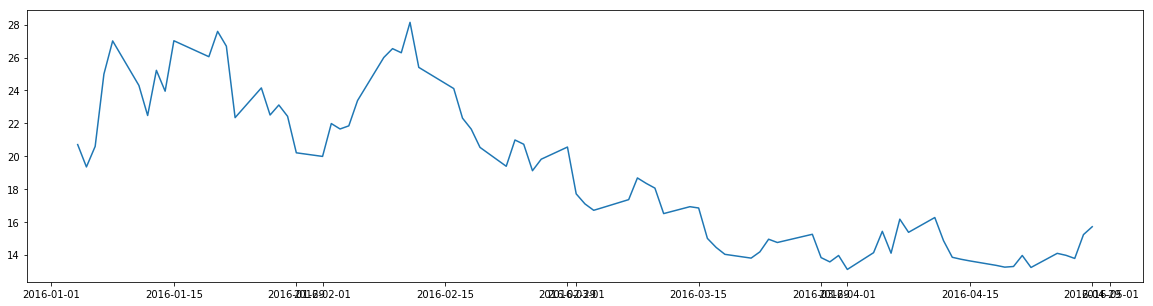

In [17]:
start_date = '2016-01-04'
end = '2016-04-29'

plt.figure(figsize=(20,5))
vix = dt.DataReader('^VIX', 'yahoo', start_date, end)
plt.plot(vix['Close'])
plt.show()

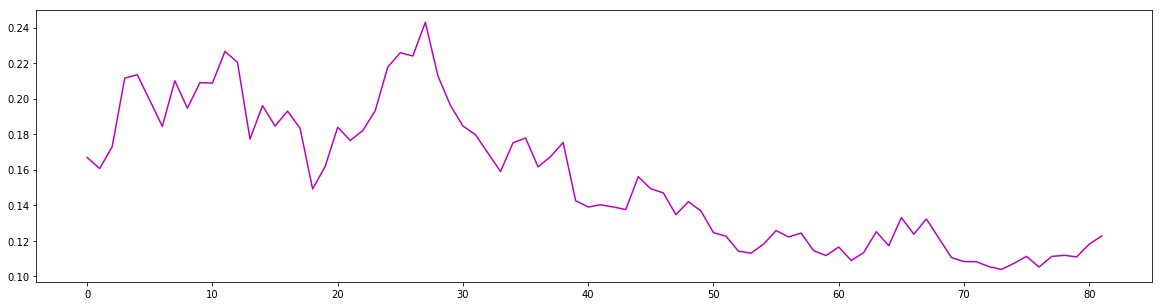

In [18]:
plt.figure(figsize=(20,5))
plt.plot(pull_data.loc[30/366,].values,color='m')
plt.show()

In [20]:
np.corrcoef(vix['Close'],pull_data.loc[30/366,].values)[0][1]

0.9939751705015301